<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/regression/forward_selection_for_loop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
!git clone https://github.com/pharringtonp19/business-analytics.git

fatal: destination path 'business-analytics' already exists and is not an empty directory.


### **Import Packages**

In [82]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import jax.numpy as jnp
import jax
import seaborn as sb
from functools import partial
from sklearn.model_selection import train_test_split

### **Read In Data Set**

In [83]:
df = pd.read_csv('/content/business-analytics/datasets/brookline.csv')
df.head()

,price,stNumber,stName,size,beacon,baseFloor,buildingStyle,elevators,rooms,bedrooms,fullBathrooms,halfBathrooms,garage
0,174000,150,PLEASANT ST,1060,0,4,MID-RISE,1,4,2,1,1,1.0
1,337000,7,LEVERETT ST,831,0,1,DECKER,0,4,2,1,0,0.0
2,850000,24,EUSTON ST,2246,0,1,ROW-END,0,10,6,3,0,0.0
3,516000,417,WASHINGTON ST,1574,0,2,LOW-RISE,0,6,3,2,0,0.0
4,145000,150,PLEASANT ST,669,0,4,MID-RISE,1,3,1,1,0,1.0


### **Train/Test Split**

In [84]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

### **Helper Functions**

In [85]:
def adj_r2(reg_formula):
  linear_model = smf.ols(reg_formula, data=df)
  results = linear_model.fit()
  return results.rsquared_adj

def out_sample_mse(reg_formula):
  linear_model = smf.ols(reg_formula, data=df_train)
  results = linear_model.fit()
  y_true = df_test[reg_formula.split('~')[0].strip()]
  predictions = results.predict(df_test)
  return ((y_true - predictions)**2).mean()

def update_regression_formula(regression_formula: str, var:str) -> str:
  if regression_formula.rstrip()[-1] == '~':
    regression_formula += var
  else:
    regression_formula += ' + ' + var
  return regression_formula

### **Dependent Variable**

In [86]:
dep_var = 'price'

### **Variable Representations**

In [87]:
eligible_variables = df.columns.drop(['stNumber', 'stName', dep_var]).tolist()
categorical_vars = ['buildingStyle']
eligible_variables_rep = {}
for var in eligible_variables:
  if var in categorical_vars:
    eligible_variables_rep[var] = 'C(' + var + ')'
  else:
    eligible_variables_rep[var] = var

### **Selection Criteria**

In [88]:
selection_function = adj_r2

### **Regression Formula**

In [89]:
reg_formula = dep_var + ' ~ '

### **For Loop**

In [90]:
results_history = []
rhs_vars = []
for i in range(len(eligible_variables)):
  regression_formulas = list(map(partial(update_regression_formula, reg_formula), eligible_variables_rep.values()))
  results = np.array(list(map(selection_function, regression_formulas)))
  idx = np.argmax(results)
  var = list(eligible_variables_rep.keys())[idx]
  var_rep = list(eligible_variables_rep.keys())[idx]
  reg_formula =  update_regression_formula(reg_formula, var_rep)
  del eligible_variables_rep[var]
  results_history.append(results[idx])
  rhs_vars.append(var)

### **Plot**

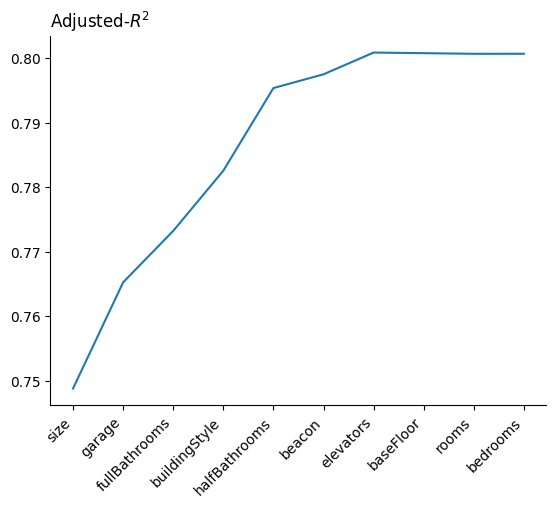

In [97]:
plt.plot(rhs_vars, results_history)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(range(len(rhs_vars)))  # Set positions (0, 1, 2, 3, 4)
ax.set_xticklabels(rhs_vars, rotation=45, ha='right')  # Set labels
plt.title(r'Adjusted-$R^2$', loc='left')
plt.show()